In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data = data.drop(labels=['Name', 'PassengerId', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [4]:
data['Survived'] = data['Survived'].astype('bool')
data['Pclass'] = data['Pclass'].astype('category')
data['Sex'] = data['Sex'].astype('category')


In [5]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,False,3,male,22.0,1,0,7.2500
1,True,1,female,38.0,1,0,71.2833
2,True,3,female,26.0,0,0,7.9250
3,True,1,female,35.0,1,0,53.1000
4,False,3,male,35.0,0,0,8.0500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null bool
Pclass      891 non-null category
Sex         891 non-null category
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: bool(1), category(2), float64(2), int64(2)
memory usage: 30.7 KB


In [7]:
data = data[np.invert(data.Age.isnull())]

## clean data from here

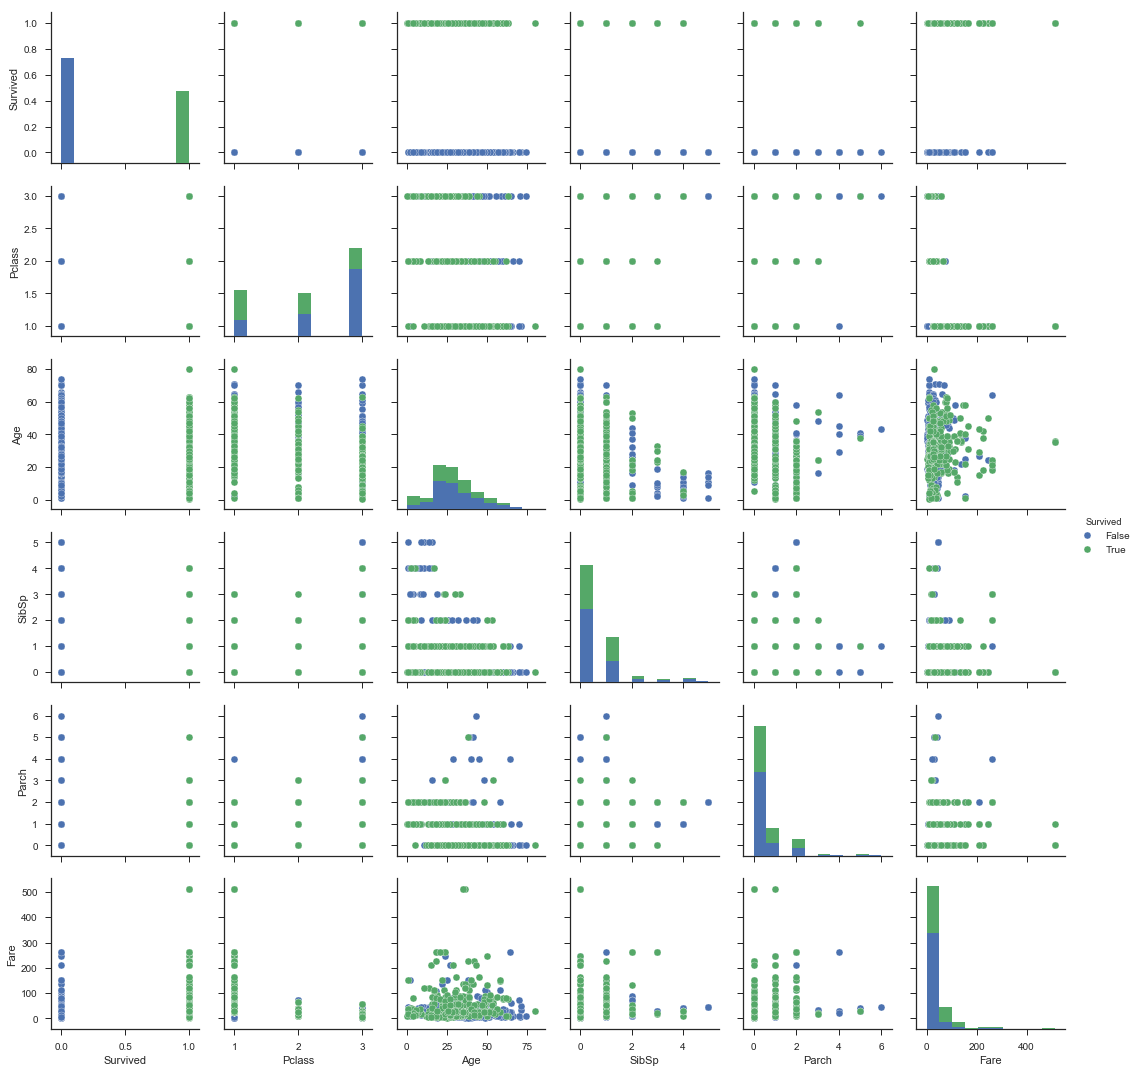

In [8]:
# c = ['b' if x else 'r' for x in data.Survived]
# pd.plotting.scatter_matrix(data, figsize=[10,10], marker='D', color=c)
g = sns.pairplot(data, hue="Survived", dropna=True)  # , vars=['Age', 'SibSp', 'Parch', 'Fare']

In [9]:
data = pd.get_dummies(data=data, prefix='Pclass', columns=['Pclass'], drop_first=True)
data = pd.get_dummies(data=data, prefix='Sex', columns=['Sex'], drop_first=True)
data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male
0,False,22.0,1,0,7.2500,0,1,1
1,True,38.0,1,0,71.2833,0,0,0
2,True,26.0,0,0,7.9250,0,1,0
3,True,35.0,1,0,53.1000,0,0,0
4,False,35.0,0,0,8.0500,0,1,1


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [11]:
model = LogisticRegression()

In [12]:
X_train, X_test, y_train, y_test = \
train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=0.33, random_state=42)

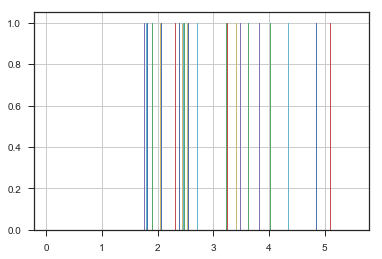

In [13]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
X_train['Fare'] = X_train['Fare'].apply(transformer.transform)
X_train.Fare.hist()

pandas.core.frame.DataFrame

In [14]:
model.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
y_pred = model.predict(X_test)

In [16]:
print(classification_report(y_true=y_test, y_pred=y_pred))

             precision    recall  f1-score   support

      False       1.00      0.03      0.06       137
       True       0.43      1.00      0.60        99

avg / total       0.76      0.44      0.28       236

